# Angle Monitoring in PowSyBl OpenRAO

PowSyBl OpenRAO main purpose is to determine an optimal combination of remedial actions to apply on a power grid in order to remove overloads on every line. This optimization is flow-oriented. However, OpenRAO also provides a **monitoring** module that is able to check **voltage and angle constraints** and activate remedial actions.

In [1]:
#pip install pypowsybl==1.12.0
# set up logging
import logging
logging.getLogger('powsybl').setLevel(logging.INFO)
logging.basicConfig(format='%(asctime)s - %(levelname)s - %(name)s - %(message)s')

In [1]:
import pypowsybl as pp
from pypowsybl.rao import Parameters as RaoParameters




In [14]:
# # Simple case with GlskB45test
# 1) simple cse with topo
#     2) simple case with injection : solves angle cnecs constraints
# 3) micro grid case


In [15]:
# MicroGrid case with GlskB45MicroGridTest

2025-08-27 11:22:49,071 - INFO - powsybl - loadflow provider used is : OpenLoadFlow
2025-08-27 11:22:49,071 - INFO - powsybl - Version: {repositoryName=powsybl-open-loadflow, mavenProjectVersion=1.16.0, gitVersion=9f4cb68a4139a1a5db7353e4b81ae590377f3096, gitBranch=UNKNOWN, buildTimestamp=2025-07-10T12:40:12.650Z}
2025-08-27 11:22:49,075 - INFO - powsybl - Parameters:
┌───────────────────────────┬───────────────────────────────────────────────────────────┬──────────────────────────────────┐
│ Category                  │ Name                                                      │ Value                            │
├───────────────────────────┼───────────────────────────────────────────────────────────┼──────────────────────────────────┤
│ Automation                │ simulateAutomationSystems                                 │ false                            │
│ DC                        │ dcApproximationType                                       │ IGNORE_R                         │
│   

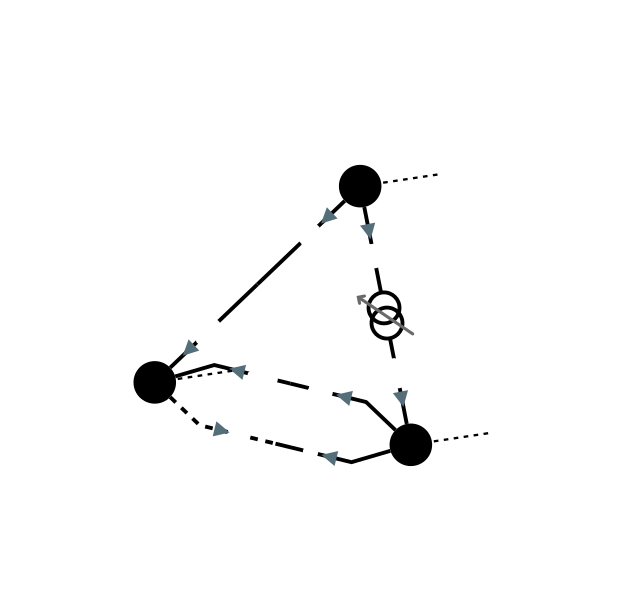

In [16]:
network =  pp.network.load("./data/rao/angle_monitoring/network.xiidm")
pp.loadflow.run_ac(network)
network.get_network_area_diagram()

In [17]:
parameters = RaoParameters()
parameters.load_from_file_source("./data/rao/rao_parameters.json")
load_flow_parameters = parameters.loadflow_and_sensitivity_parameters.sensitivity_parameters.load_flow_parameters
load_flow_parameters

Parameters(voltage_init_mode=UNIFORM_VALUES, transformer_voltage_control_on=False, use_reactive_limits=True, phase_shifter_regulation_on=False, twt_split_shunt_admittance=True, shunt_compensator_voltage_control_on=False, read_slack_bus=False, write_slack_bus=False, distributed_slack=True, balance_type=PROPORTIONAL_TO_GENERATION_P, dc_use_transformer_ratio=False, countries_to_balance=['BE', 'FR', 'TR', 'GR', 'UA', 'RS', 'NL', 'SK', 'ES', 'AL', 'SI', 'CZ', 'ME', 'BA', 'HU', 'BG', 'IT', 'PL', 'RO', 'PT', 'HR', 'DE', 'AT', 'MK', 'CH'], connected_component_mode=<ConnectedComponentMode.MAIN: 0>, hvdc_ac_emulation=True, dc_power_factor=1.0, provider_parameters={})

In [18]:
rao_runner = pp.rao.create_rao()
rao_runner.set_crac_file_source(network, "./data/rao/angle_monitoring/angle_monitoring_simple_case_with_injectionRa.json")

In [19]:
rao_result = rao_runner.run(network, parameters)
rao_result.get_flow_cnec_results()

2025-08-27 11:22:49,113 - WARNING - powsybl - Running RAO using Open RAO version 6.6.0 from git commit 4aa4ea6cf728c58414986e13216923c054a475f8.
2025-08-27 11:22:49,114 - WARNING - powsybl - Contingency coL1L2 has an automaton or a curative remedial action but no CNECs associated.
2025-08-27 11:22:49,114 - WARNING - powsybl - Contingency coL1 has an automaton or a curative remedial action but no CNECs associated.
2025-08-27 11:22:49,115 - WARNING - powsybl - Contingency coL2 has an automaton or a curative remedial action but no CNECs associated.
2025-08-27 11:22:49,116 - INFO - powsybl - Network {CC0 SC0} has 3 buses and 4 branches
2025-08-27 11:22:49,116 - INFO - powsybl - Network {CC0 SC0} balance: active generation=100.0 MW, active load=100.0 MW, reactive generation=0.0 MVar, reactive load=50.0 MVar
2025-08-27 11:22:49,117 - INFO - powsybl - Network {CC0 SC0}, slack buses are [VL1_0] (method='Network extension bus')
2025-08-27 11:22:49,117 - INFO - powsybl - Network {CC0 SC0}, refer

,cnec_id,optimized_instant,contingency,side,flow,margin,relative_margin,commercial_flow,loop_flow,ptdf_zonal_sum
index,,,,,,,,,,
4,fcPrev,initial,,ONE,50.089474,1266.26914,NaN,NaN,NaN,NaN
5,fcPrev,initial,,TWO,0.000000,1266.26914,NaN,NaN,NaN,NaN
6,fcPrev,preventive,,ONE,50.089474,1266.26914,NaN,NaN,NaN,NaN
7,fcPrev,preventive,,TWO,0.000000,1266.26914,NaN,NaN,NaN,NaN


In [20]:
# rao_runner = pp.rao.create_rao()
# rao_runner.set_crac_file_source(network, "./data/rao/angle_monitoring/angle_monitoring_simple_case_with_injectionRa.json")
rao_runner.set_glsk_file_source(network, "./data/rao/angle_monitoring/GlskB45test.xml")
result_with_angle_monitoring = rao_runner.run_angle_monitoring(network, rao_result, load_flow_parameters, "OpenLoadFlow")
result_with_angle_monitoring.get_angle_cnec_results()

2025-08-27 11:22:49,147 - INFO - powsybl - CIM GLSK importer could import this document.
2025-08-27 11:22:49,149 - INFO - powsybl - ----- ANGLE monitoring [start]
2025-08-27 11:22:49,149 - INFO - powsybl - -- 'ANGLE' Monitoring at state 'preventive' [start]
2025-08-27 11:22:49,150 - INFO - powsybl - Load-flow computation [start]


In [ ]:
# Simple case
# import inputs
network =  pp.network.load("./data/rao/angle_monitoring/network.xiidm")
rao_runner = pp.rao.create_rao()
parameters = RaoParameters()
parameters.load_from_file_source("./data/rao/rao_parameters.json")
load_flow_parameters = parameters.loadflow_and_sensitivity_parameters.sensitivity_parameters.load_flow_parameters
rao_runner.set_crac_file_source(network, "./data/rao/angle_monitoring/angle_monitoring_simple_case_with_injectionRa.json")
rao_result = rao_runner.run(network, parameters)
rao_runner.set_glsk_file_source(network, "./data/rao/angle_monitoring/GlskB45test.xml") 
result_with_angle_monitoring = rao_runner.run_angle_monitoring(network, rao_result, load_flow_parameters, "OpenLoadFlow")
result_with_angle_monitoring.get_angle_cnec_results()

,cnec_id,optimized_instant,contingency,angle,margin
index,,,,,
2,acCur2,curative,coL1,NaN,NaN
3,acCur1,curative,coL1,NaN,NaN


In [ ]:
# import inputs
network =  pp.network.load("./data/rao/rao_network.uct")
rao_runner = pp.rao.create_rao()
parameters = RaoParameters()
parameters.load_from_file_source("./data/rao/rao_parameters.json")
load_flow_parameters = parameters.loadflow_and_sensitivity_parameters.sensitivity_parameters.load_flow_parameters
rao_runner.set_crac_file_source(network, "./data/rao/rao_crac.json")
rao_runner.set_glsk_file_source(network, "./data/rao/rao_glsk.xml")
rao_result = rao_runner.run(network, parameters)
result_with_angle_monitoring = rao_runner.run_angle_monitoring(network, rao_result, load_flow_parameters)
result_with_voltage_monitoring = rao_runner.run_voltage_monitoring(network, rao_result, load_flow_parameters)

PyPowsyblError: File ./data/rao/rao_network.uct does not exist

Launch monitoring

: 

In [ ]:
# prepare inputs
n12 = pp.network.load('./data/rao/12_node_network.uct')
rao_runner = pp.rao.create_rao()
rao_runner.run_angle_monitoring(network, crac)



rao_runner.set_crac_file_source(n12, "./data/rao/N_case_crac.json")
rao_parameters = RaoParameters()
rao_parameters.load_from_file_source("./data/rao/rao_parameters.json")
# set up logging
import logging
logging.getLogger('powsybl').setLevel(logging.INFO)
logging.basicConfig(format='%(asctime)s - %(levelname)s - %(message)s')
#run rao
raoResult = rao_runner.run(n12, rao_parameters)
result_json = raoResult.to_json()

2025-08-26 09:41:21,290 - ERROR - BBE1AA1  BBE2AA1  1 - Real line resistance cannot be negative (0.0 ohm)
2025-08-26 09:41:21,291 - ERROR - BBE1AA1  BBE3AA1  1 - Real line resistance cannot be negative (0.0 ohm)
2025-08-26 09:41:21,292 - ERROR - FFR1AA1  FFR2AA1  1 - Real line resistance cannot be negative (0.0 ohm)
2025-08-26 09:41:21,293 - ERROR - FFR1AA1  FFR3AA1  1 - Real line resistance cannot be negative (0.0 ohm)
2025-08-26 09:41:21,293 - ERROR - FFR2AA1  FFR3AA1  1 - Real line resistance cannot be negative (0.0 ohm)
2025-08-26 09:41:21,294 - ERROR - DDE1AA1  DDE2AA1  1 - Real line resistance cannot be negative (0.0 ohm)
2025-08-26 09:41:21,294 - ERROR - DDE1AA1  DDE3AA1  1 - Real line resistance cannot be negative (0.0 ohm)
2025-08-26 09:41:21,295 - ERROR - DDE2AA1  DDE3AA1  1 - Real line resistance cannot be negative (0.0 ohm)
2025-08-26 09:41:21,295 - ERROR - NNL1AA1  NNL2AA1  1 - Real line resistance cannot be negative (0.0 ohm)
2025-08-26 09:41:21,296 - ERROR - NNL1AA1  NNL

NameError: name 'crac' is not defined

: 

: 

## OpenRAO test

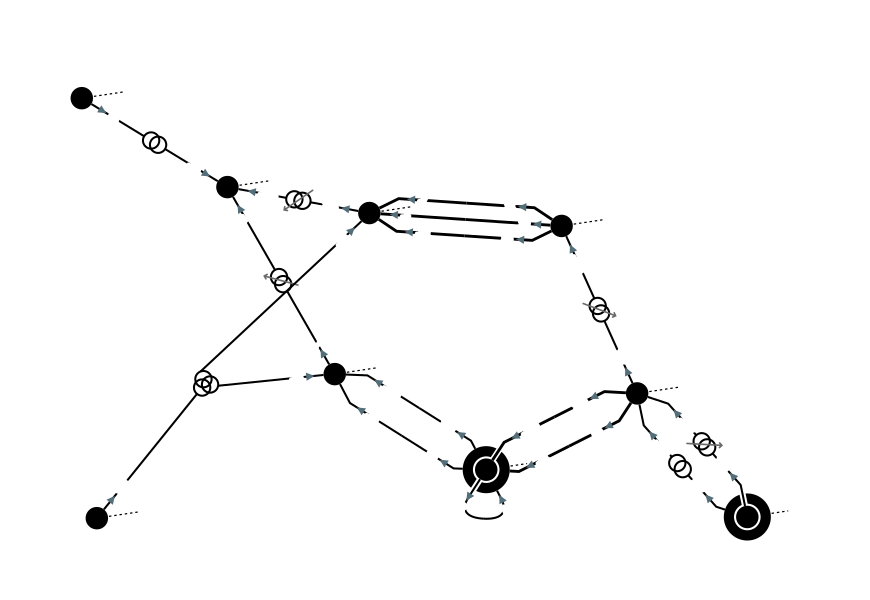

In [2]:
network =  pp.network.load("./data/rao/angle_monitoring/monitoring_network.xiidm")
pp.loadflow.run_ac(network)
network.get_network_area_diagram()

In [3]:
network.get_lines()

,name,r,x,g1,b1,g2,b2,p1,q1,i1,p2,q2,i2,voltage_level1_id,voltage_level2_id,bus1_id,bus2_id,connected1,connected2
id,,,,,,,,,,,,,,,,,,,
_ffbabc27-1ccd-4fdc-b037-e341706c8d29,BE-Line_6,5.203,71.00000,0.000060,0.000010,0.000060,0.000010,-53.477700,11.654010,140.759609,59.822208,-7.948895,156.451326,_b10b171b-3bc5-4849-bb1f-61ed9ea1ec7c,_69ef0dbd-da79-4eef-a02f-690cb8a28361,_b10b171b-3bc5-4849-bb1f-61ed9ea1ec7c_0,_69ef0dbd-da79-4eef-a02f-690cb8a28361_0,True,True
_b58bf21a-096a-4dae-9a01-3f03b60c24c7,BE-Line_2,1.935,34.20000,0.000034,0.000021,0.000034,0.000021,-116.128463,22.242985,304.083434,120.057195,-14.573272,313.531203,_b10b171b-3bc5-4849-bb1f-61ed9ea1ec7c,_69ef0dbd-da79-4eef-a02f-690cb8a28361,_b10b171b-3bc5-4849-bb1f-61ed9ea1ec7c_0,_69ef0dbd-da79-4eef-a02f-690cb8a28361_0,True,True
_df16b3dd-c905-4a6f-84ee-f067be86f5da,SER-RLC-1230822986,0.000,-31.83099,0.000000,0.000000,0.000000,0.000000,-99.604109,16.957373,261.937677,99.604109,-23.509275,261.937677,_69ef0dbd-da79-4eef-a02f-690cb8a28361,_69ef0dbd-da79-4eef-a02f-690cb8a28361,_69ef0dbd-da79-4eef-a02f-690cb8a28361_0,_69ef0dbd-da79-4eef-a02f-690cb8a28361_3,True,True


In [4]:
parameters = RaoParameters()
parameters.load_from_file_source("./data/rao/rao_parameters.json")
load_flow_parameters = parameters.loadflow_and_sensitivity_parameters.sensitivity_parameters.load_flow_parameters

In [5]:
rao_runner = pp.rao.create_rao()
rao_runner.set_crac_file_source(network, "./data/rao/angle_monitoring/angle_monitoring_crac.json")

In [6]:
rao_result = rao_runner.run(network, parameters)
rao_result.get_flow_cnec_results()

,cnec_id,optimized_instant,contingency,side,flow,margin,relative_margin,commercial_flow,loop_flow,ptdf_zonal_sum
index,,,,,,,,,,
0,FlowCnec - Co-1,initial,Co-1,ONE,-156.368561,1159.990052,NaN,NaN,NaN,NaN
1,FlowCnec - Co-1,initial,Co-1,TWO,0.000000,1159.990052,NaN,NaN,NaN,NaN
2,FlowCnec - Co-1,curative,Co-1,ONE,-156.368561,1159.990052,NaN,NaN,NaN,NaN
3,FlowCnec - Co-1,curative,Co-1,TWO,0.000000,1159.990052,NaN,NaN,NaN,NaN
4,FlowCnec - Co-2,initial,Co-2,ONE,-116.164515,1200.194098,NaN,NaN,NaN,NaN
5,FlowCnec - Co-2,initial,Co-2,TWO,0.000000,1200.194098,NaN,NaN,NaN,NaN
6,FlowCnec - Co-2,curative,Co-2,ONE,-116.164515,1200.194098,NaN,NaN,NaN,NaN
7,FlowCnec - Co-2,curative,Co-2,TWO,0.000000,1200.194098,NaN,NaN,NaN,NaN
8,FlowCnec,initial,,ONE,-116.101549,1200.257065,NaN,NaN,NaN,NaN


In [7]:
rao_runner.set_glsk_file_source(network, "./data/rao/angle_monitoring/GlskB45MicroGridTest.xml")
result_with_angle_monitoring = rao_runner.run_angle_monitoring(network, rao_result, load_flow_parameters, "OpenLoadFlow")
result_with_angle_monitoring.get_angle_cnec_results()

,cnec_id,optimized_instant,contingency,angle,margin
index,,,,,
0,AngleCnec2,curative,Co-2,-19.310243,66.310243
1,AngleCnec1,curative,Co-1,5.246296,-2.246296
